# MOwNiT 
## Laboratorium
## Wybrane zagadnienia algebry liniowej, faktoryzacja
### Algebra liniowa w Julii
https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/index.html


In [1]:
using(LinearAlgebra)

In [2]:
methods(factorize)

# 12 methods for generic function "factorize":
[1] factorize(A::StridedMatrix{T}) where T in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\dense.jl:1319
[2] factorize(A::Adjoint) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\dense.jl:1393
[3] factorize(A::Transpose) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\dense.jl:1394
[4] factorize(a::Number) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\dense.jl:1395
[5] factorize(A::LinearAlgebra.AbstractTriangular) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\triangular.jl:2659
[6] factorize(A::Tridiagonal) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\lu.jl:570
[7] factorize(D::Diagonal) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\diagonal.jl:149
[8] factorize(A::Bidiagonal) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\bidiag.jl:927
[9] factorize(S::SymTridiagonal) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\ldlt.jl:172
[10] factorize(A::SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\SparseArrays\src\linalg.jl:1612
[11] factorize(A::Union{Hermitian{ComplexF64, var"#s886"}, Hermitian{Float64, var"#s886"}, Symmetric{Float64, var"#s886"}} where var"#s886"<:SparseArrays.AbstractSparseMatrixCSC) in SparseArrays at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\SparseArrays\src\linalg.jl:1642
[12] factorize(A::Union{Hermitian{T, S}, Symmetric{T, S}} where {T, S}) in LinearAlgebra at C:\Users\Kaslo\AppData\Local\Programs\Julia-1.8.5\share\julia\stdlib\v1.8\LinearAlgebra\src\symmetric.jl:611

In [3]:
#wiersze vs kolumny
x1=[1 2 2]

1×3 Matrix{Int64}:
 1  2  2

In [4]:
y1=[1 ;2 ;3]

3-element Vector{Int64}:
 1
 2
 3

In [5]:
transpose(x1)

3×1 transpose(::Matrix{Int64}) with eltype Int64:
 1
 2
 2

In [6]:
#iloczyn skalarny
dot(x1,y1)

11

 Długość wektora liczymy jako pierwiastek z jego iloczynu skalarnego 
$$ \lVert\mathbf{v}\rVert = \sqrt{\mathbf{v}\cdot \mathbf{v}}=\sqrt{\sum_{i=1}^nv_i^2}$$



#### Przykładowe dane

In [7]:
#losujemy macierz 3x3
A=rand(3,3)

3×3 Matrix{Float64}:
 0.647521  0.828711  0.537346
 0.597961  0.332314  0.22428
 0.744165  0.448874  0.735424

In [8]:
#losujemy wektor x
x=rand(3)

3-element Vector{Float64}:
 0.7421393279745356
 0.14791478216823173
 0.03681291860874836

In [9]:
# wyliczamy b
b=A*x

3-element Vector{Float64}:
 0.6229109843665104
 0.501180621065223
 0.6457424821066268

### Sposoby rozwiązania Ax=b

In [10]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
inv(A) * b

3-element Vector{Float64}:
 0.7421393279745356
 0.14791478216823173
 0.03681291860874836

In [11]:
#najlepiej używać zoptymalizowanego operatora "\""
x=A\b

3-element Vector{Float64}:
 0.7421393279745359
 0.14791478216823162
 0.03681291860874844

 operator "\\" wybiera odpowiednią faktoryzację:
- https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/#LinearAlgebra.factorize
- https://docs.julialang.org/en/v1.8/stdlib/LinearAlgebra/#man-linalg-factorizations-1
 


### Faktoryzacja LU

In [12]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
Af=factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0        0.0
 0.870131   1.0        0.0
 0.803532  -0.0647534  1.0
U factor:
3×3 Matrix{Float64}:
 0.744165  0.448874   0.735424
 0.0       0.438132  -0.102569
 0.0       0.0       -0.373298

In [13]:
# Macierz L
Af.L

3×3 Matrix{Float64}:
 1.0        0.0        0.0
 0.870131   1.0        0.0
 0.803532  -0.0647534  1.0

In [14]:
#Macierz U
Af.U

3×3 Matrix{Float64}:
 0.744165  0.448874   0.735424
 0.0       0.438132  -0.102569
 0.0       0.0       -0.373298

In [15]:
# wektor permulatacji wierszy 
Af.p

3-element Vector{Int64}:
 3
 1
 2

In [16]:
# mozemy zamienic macierz A na postać zfaktoryzowaną
A=factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0        0.0        0.0
 0.870131   1.0        0.0
 0.803532  -0.0647534  1.0
U factor:
3×3 Matrix{Float64}:
 0.744165  0.448874   0.735424
 0.0       0.438132  -0.102569
 0.0       0.0       -0.373298

In [17]:
# i działać na niej operatorem \
# operator ten będzie wykorzytywał raz utworzony wynik faktoryzacji
A\b

3-element Vector{Float64}:
 0.7421393279745359
 0.14791478216823162
 0.03681291860874844

In [18]:
# dla różnych prawych stron równania z tą samą macierzą
c=rand(3);
A\c

3-element Vector{Float64}:
 -0.23044797689660765
  1.0407357844963123
  0.3008468447749791

### Faktoryzacja QR


In [19]:
B=rand(10,5)

10×5 Matrix{Float64}:
 0.759583  0.69702   0.30873     0.231038  0.217247
 0.953187  0.401549  0.504496    0.744171  0.694174
 0.803024  0.346998  0.559089    0.722506  0.496118
 0.53849   0.723571  0.258229    0.552944  0.313287
 0.751673  0.847835  0.929233    0.966785  0.0452804
 0.549612  0.450322  0.359992    0.344949  0.437831
 0.660664  0.324577  0.00155398  0.646623  0.199298
 0.971584  0.968666  0.6086      0.27578   0.360415
 0.664552  0.372688  0.701109    0.275349  0.741287
 0.143251  0.286189  0.873848    0.359244  0.44194

In [20]:
# W przypadku ogólnej macierzy prostokątnej wybierana jest faktoryzacja QR z pivotem
factorize(B)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}:
 -0.335363   -0.181892     0.332912   …  -0.398655     0.000732897
 -0.420841   -0.117456    -0.144527       0.131119     0.581279
 -0.354542    0.027926    -0.199268      -0.499957    -0.555638
 -0.237748   -0.091698    -0.268422       0.0494444   -0.216469
 -0.33187     0.410263    -0.42271        0.330194    -0.053158
 -0.242659   -0.00233537   0.0546624  …  -0.0464604   -0.0576898
 -0.291689   -0.410854    -0.404451       0.0282139    0.14113
 -0.428963   -0.0304185    0.531818       0.00762352   0.19085
 -0.293406    0.248748     0.354253       0.544446    -0.369845
 -0.0632468   0.737568    -0.0542781     -0.403755     0.327477
R factor:
5×5 Matrix{Float64}:
 -2.26496  -1.4937   -1.59325   -1.19483   -1.72609
  0.0       1.05668   0.295275   0.29914    0.257148
  0.0       0.0      -0.749665   0.14352    0.0772414
  0.0       0.0 

- $Q$ to macierz  ortogonalna mxm, co oznacza, że  $Q^T*Q=Q*Q^T=I$ czyli $Q^{-1}=Q^T$ (odwracanie takich macierzy jest szybkie i nie generuje dodatkowych błędów !)
- $R$ to macierz postaci $\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} $ , gdzie $Rfactor$ jest macierzą trójkątną górną, a 0 to macierz zer o wymierze nx(m-n)

### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=wsp_2*x^2+wsp_1*x+wsp_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$wsp_2x_i^2+wsp_1x_i+wsp_0=y_i$$:
$$wsp_2*1^2+wsp_1*1+wsp_0=1$$
$$wsp_2*2^2+wsp_1*2+wsp_0=2$$
$$wsp_2*3^2+wsp_1*3+wsp_0=4$$
$$wsp_2*4^2+wsp_1*4+wsp_0=4$$
$$wsp_2*5^2+wsp_1*5+wsp_0=3$$
$$wsp_2*6^2+wsp_1*6+wsp_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $wsp_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*wsp\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

#### 1. Tworzymy macierz A na postawie $(x_i,y_i)$

In [21]:
A=zeros(6,3) 

6×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

 punkty $(x_i,y_i)$


In [22]:
x=[1; 2 ;3 ;4 ;5 ;6]
y=[1; 2; 4; 4; 3; 0]

6-element Vector{Int64}:
 1
 2
 4
 4
 3
 0

In [23]:
A[:,1]=x.^2

6-element Vector{Int64}:
  1
  4
  9
 16
 25
 36

In [24]:
A[:,2]=x

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [25]:
A[:,3]=ones(6)

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [26]:
A

6×3 Matrix{Float64}:
  1.0  1.0  1.0
  4.0  2.0  1.0
  9.0  3.0  1.0
 16.0  4.0  1.0
 25.0  5.0  1.0
 36.0  6.0  1.0

#### 2. Dokonujemy faktoryzacji QR macierzy A 

In [27]:
 AF=factorize(A)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor:
6×6 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}:
 -0.0209657  -0.343313    0.838525   0.112335    -0.0400677  -0.405397
 -0.0838628  -0.521522    0.167705  -0.00636667   0.34634     0.756879
 -0.188691   -0.534625   -0.223607  -0.612934    -0.487947   -0.121617
 -0.335451   -0.382624   -0.33541    0.753648    -0.213523   -0.122449
 -0.524142   -0.0655178  -0.167705  -0.204705     0.705864   -0.390779
 -0.754765    0.416693    0.279508  -0.0419783   -0.310667    0.283364
R factor:
3×3 Matrix{Float64}:
 -47.697  -9.24587  -1.90788
   0.0    -2.34816  -1.43091
   0.0     0.0       0.559017
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [28]:
# można przetestować ortogonalność:
Transpose(AF.Q)*AF.Q

6×6 Matrix{Float64}:
  1.0           0.0           1.66533e-16  …   2.77556e-17  -2.77556e-17
  0.0           1.0           5.55112e-17      8.32667e-17  -9.71445e-17
  1.66533e-16   5.55112e-17   1.0             -6.93889e-17  -2.77556e-17
 -2.08167e-17  -4.85723e-17  -7.97973e-17     -6.59195e-17  -3.1225e-17
  2.77556e-17   8.32667e-17  -6.93889e-17      1.0          -2.77556e-17
 -2.77556e-17  -9.71445e-17  -2.77556e-17  …  -2.77556e-17   1.0

Mamy równanie:
$$A*wsp=y$$
Dla $A=QR$:
$$QR*wsp =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*wsp =Q^T y$$
$$\begin{pmatrix} Rfactor \\ 0 \end{pmatrix} wsp= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$Rfactor * wsp= Q^T y[1:n]$$
$$wsp=Rfactor \setminus Q^T y[1:n]$$

In [29]:
# implementacja powyższego (uwaga: w tym przykladzie nie jest potrzebna permutacja,
# bo wektor permutacji wynosi[1 2 3])
AF.R\((Transpose(AF.Q)*y)[1:3])

3-element Vector{Float64}:
 -0.5714285714285724
  3.94285714285715
 -2.8000000000000145

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

W praktyce używamy tego algorytmu poprzez operator "\\", za którym jest on "schowany".

In [30]:
A \ y

3-element Vector{Float64}:
 -0.5714285714285723
  3.9428571428571493
 -2.8000000000000136

In [31]:
#sprawdzamy czy dostaliśmy dobre wspólczynniki
using Polynomials
fit(x,y, 2)

Polynomial(-2.8000000000000136 + 3.9428571428571493*x - 0.5714285714285723*x^2)

In [32]:
@which fit

Polynomials

### Zadania

#### Zadanie 1 (2 pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

#### Zadanie 2 (2 pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

#### Zadanie 3 (4 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 



#### Zadanie 1 (2 pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !

In [2]:
using LinearAlgebra
using Statistics

x = rand(1000)
A = rand(1000,1000)
b = A * x

function method_1(A, b)
    return inv(A) * b
end

function method_2(A, b)
    return A \ b
end

function method_3(AF, b)
    return AF \ b
end

println("inv()")
println("Średnia z różnicy wektorów: ", mean(method_1(A, b) - x))
println("Czas wykonania: ", (@timed method_1(A, b)).time, " s")
println()

println("\\")
println("Średnia z różnicy wektorów: ", mean(method_2(A, b) - x))
println("Czas wykonania: ", (@timed method_2(A, b)).time, " s")
println()

Af = factorize(A)
println("factorize()")
println("Średnia z różnicy wektorów: ", mean(method_3(Af, b) - x))
println("Czas wykonania: ", (@timed method_3(Af, b)).time, " s")

inv()
Średnia z różnicy wektorów: 3.8356817722018375e-15


Czas wykonania: 0.0185084 s

\
Średnia z różnicy wektorów: 4.0351034145957866e-16
Czas wykonania: 0.0068887 s

factorize()
Średnia z różnicy wektorów: 4.0351034145957866e-16
Czas wykonania: 0.0003133 s


#### Zadanie 2 (2 pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

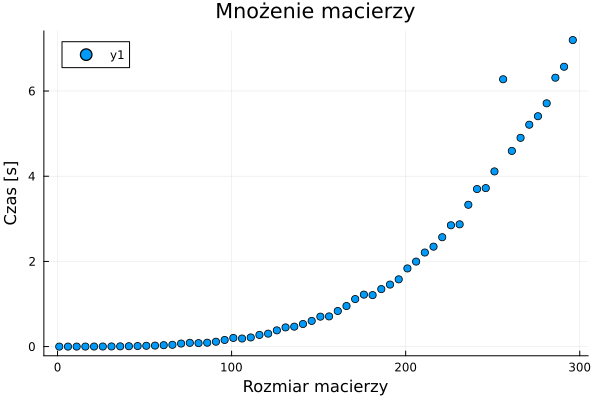

In [4]:
using DataFrames
using Statistics
using Plots
using CSV
using Polynomials

# Wczytujemy dane z pliku CSV
results = CSV.read("../Lab5/results.csv", DataFrame)

# Korzystając z mechanizmów DataFrame, grupujemy dane po rozmiarze macierzy i nazwie funkcji
results_grouped = groupby(results, [:matrix_size, :function_name])

# Obliczamy średną i odchylenie standardowe
results_combined = combine(results_grouped, "time" => mean, "time" => var)

naive_results = filter(row -> row.function_name == "naive_multiplication", results_combined)

# Rysujemy wykres ze słupkami błędów, podpisanymi osiami i tytułami
scatter(
    naive_results.matrix_size,
    naive_results.time_mean,
    xlabel="Rozmiar macierzy",
    ylabel="Czas [s]",
    title="Mnożenie macierzy")

In [6]:
using(LinearAlgebra)

n = length(naive_results.matrix_size)

A = zeros(n,4)
A[:,1] = naive_results.matrix_size.^3
A[:,2] = naive_results.matrix_size.^2
A[:,3] = naive_results.matrix_size
A[:,4] = ones(n)

AF = factorize(A)
println("Policzone współczynniki: ", AF.R\((Transpose(AF.Q)*naive_results.time_mean)[1:4]))

println("Wielomian uzyskany poprzez fit(): ", fit(naive_results.matrix_size, naive_results.time_mean, 3))

Policzone współczynniki: [3.7735764753691986e-7, -3.30873976075646e-5, 0.0008492623737581339, 0.00895521027387744]
Wielomian uzyskany poprzez fit(): 0.00895521 + 0.000849262*x - 3.30874e-5*x^2 + 3.77358e-7*x^3


#### Zadanie 3 (4 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 

In [13]:
# uzycie faktoryzacji QR do znajdowania wartości własnych

using LinearAlgebra

function qr_eigenvalues(A)
    n = size(A, 1)
    Q, R = qr(A)

    for i in 1:n
        # Przesunięcie QR
        A = R * Q
        Q, R = qr(A)
    end

    return diag(A)
end

# Przykładowa macierz
A = [1 2 3; 4 5 6; 7 8 10]

# Wyświetlenie wartości własnych
println("Wartości własne poprzez faktoryzację QR: ", qr_eigenvalues(A))
println("Wartości własne poprzez wbudowaną funkcję: ", eigvals(A))


Wartości własne poprzez faktoryzację QR: [16.705972325154963, -0.9051889217021699, 0.19921659654722154]
Wartości własne poprzez wbudowaną funkcję: [-0.9057401795217589, 0.1982468633970087, 16.707493316124744]
